# Periodic Osccilation

## Given:
Two massless bodies rotating about a primary exists in integer ratio

## Find:
a) Jupiter is circular radius 5.2 AU. Body $A$ is in a shorter period $3:2$ Resonance. Body $C$ be circular in large period $3:4$ resonance. Determine period $P$ and $n$ of all three bodies.

b) Define inertial frame and plot the bodies. Mark the position of $A$ and $C$ at time $t = iP$; where $i = 0$, $0.25,$ $0.50,$ $0.75,$ $1$

c) Define Sun as the origin in a Jupiter rotating frame. Develop the roation matrix. Plot $A$ and $C$ in roatating frame and mark the same intervals. 

d) Redo the parts (b) and (c) but change the eccentricity to $e = 0.2,$ $0.3,$ $0.4$. Mark the periapsis and the apoapsis. Interior or exterior resonance? 

e) Assume periapsis is $180^o$ out of phase for $A$ and $C$ with respect to Jupiter.

In [31]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_S as SS
from Functions import Keplarian_fnc as kp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
# Given
res_A = 3/2
res_C = 3/4

miu = SS.loc["Sun",'miu'] + SS.loc["Jupiter","miu"]
a_Jup = 5.2/2 * SS.loc['Earth','a']


### Part a)

In [33]:
Per_Jup = 2*np.pi*np.sqrt(a_Jup**3/miu)
n_Jup = np.sqrt(miu/a_Jup**3)

a_A = (res_A**2 * a_Jup**3)**(1/3)
Per_A = Per_Jup/res_A
n_A = np.sqrt(miu/a_A**3)

a_C = (res_C**2 * a_Jup**3)**(1/3)
Per_C = Per_Jup/res_C
n_C = np.sqrt(miu/a_C**3)

print('Period of Jupiter (years):', Per_Jup/3600/24/365)
print('Period of A (years):', Per_A/3600/24/365)
print('Period of C (years):', Per_C/3600/24/365)

Period of Jupiter (years): 13.20389661245389
Period of A (years): 8.802597741635926
Period of C (years): 17.605195483271853


## Part b)

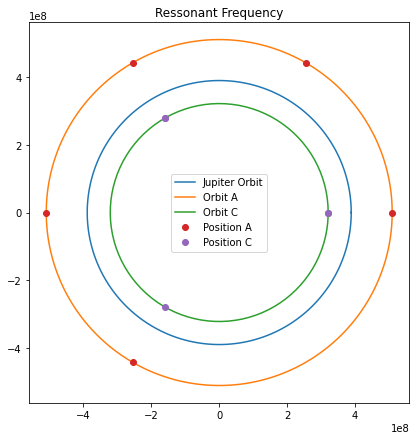

In [34]:
thst = np.linspace(0,2*np.pi,200)
time_pos = np.linspace(0,1,5)
thst_pos_A = time_pos*Per_Jup*n_A
thst_pos_C = time_pos*Per_Jup*n_C


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
kp.plot_2d(a_Jup, 0, thst, axs)
kp.plot_2d(a_A, 0, thst, axs)
kp.plot_2d(a_C, 0, thst, axs)

kp.plot_2d(a_A, 0, thst_pos_A, axs, vis='o')
kp.plot_2d(a_C, 0, thst_pos_C, axs, vis='o')
axs.set_aspect('equal', 'box')
axs.set_title('Ressonant Frequency')
axs.legend(['Jupiter Orbit', 'Orbit A', 'Orbit C', 'Position A', 'Position C'])



## Part c)

Text(0.5, 1.0, 'Periodic Orbit in Jupiter Frame')

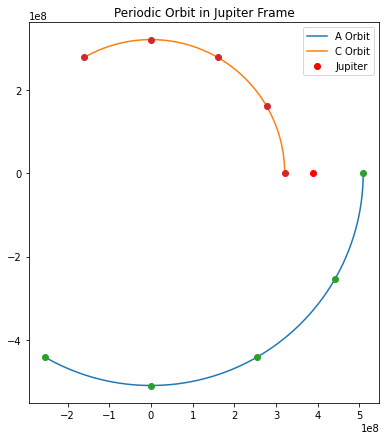

In [35]:
time = np.linspace(0,Per_Jup,500)
pos  = np.linspace(0,1,5)*Per_Jup
e = 0

thst_Jup = n_Jup*time
thst_Jup_pos = n_Jup*pos

def Jup_frame(time, n, e, a):
    M = time*n
    E = np.array([kp.E_M(m, e) for m in M])
    thst = kp.thst_E_e(E,e)
    r_I = kp.keplar_r(a*(1-e**2),e,thst)*np.vstack((np.cos(thst),np.sin(thst)))
    return r_I

r_I_A = Jup_frame(time, n_A, e, a_A)
r_I_C = Jup_frame(time, n_C, e, a_C)

r_I_A_pos = Jup_frame(pos, n_A, e, a_A)
r_I_C_pos = Jup_frame(pos, n_C, e, a_C)

C_IJ = np.array([[np.cos(thst_Jup), np.sin(thst_Jup)],[-np.sin(thst_Jup), np.cos(thst_Jup)]] )
C_IJ_pos = np.array([[np.cos(thst_Jup_pos), np.sin(thst_Jup_pos)],[-np.sin(thst_Jup_pos), np.cos(thst_Jup_pos)]] )

r_Jup_A = np.zeros(r_I_A.shape)
r_Jup_C = np.zeros(r_I_C.shape)
for i in range(len(thst_Jup)):
    r_Jup_A[:,i] = C_IJ[:,:,i] @ r_I_A[:,i]
    r_Jup_C[:,i] = C_IJ[:,:,i] @ r_I_C[:,i]
    
r_Jup_A_pos = np.zeros(r_I_A_pos.shape)
r_Jup_C_pos = np.zeros(r_I_C_pos.shape)
for i in range(len(thst_Jup_pos)):
    r_Jup_A_pos[:,i] = C_IJ_pos[:,:,i] @ r_I_A_pos[:,i]
    r_Jup_C_pos[:,i] = C_IJ_pos[:,:,i] @ r_I_C_pos[:,i]

# Plots
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.plot(r_Jup_A[0,:],r_Jup_A[1,:])
axs.plot(r_Jup_C[0,:],r_Jup_C[1,:])
axs.plot(a_Jup, 0, 'or')
axs.plot(r_Jup_A_pos[0,:], r_Jup_A_pos[1,:],'o')
axs.plot(r_Jup_C_pos[0,:], r_Jup_C_pos[1,:],'o')
axs.legend(['A Orbit', 'C Orbit', 'Jupiter'])
axs.set_aspect('equal', 'box')
axs.set_title('Periodic Orbit in Jupiter Frame')


## Part d)
### e = 0.2

Text(0.5, 1.0, 'Periodic Orbit in Jupiter Rotating Frame')

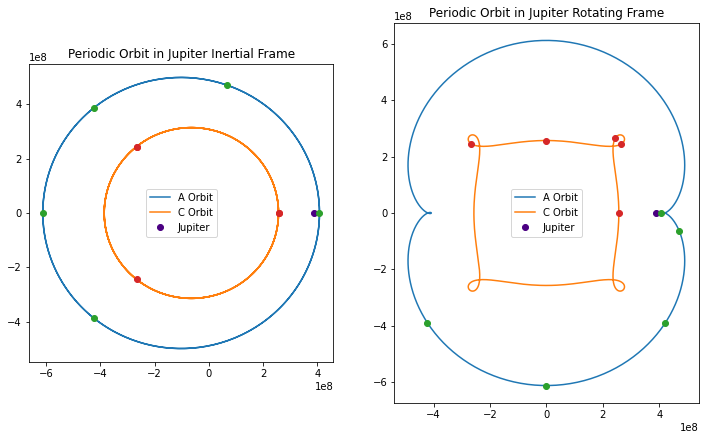

In [36]:
time = np.linspace(0,Per_Jup*3,500)
pos  = np.linspace(0,1,5)*Per_Jup
e = 0.2

thst_Jup = n_Jup*time
thst_Jup_pos = n_Jup*pos

def Jup_frame(time, n, e, a):
    M = time*n
    E = np.array([kp.E_M(m, e) for m in M])
    thst = kp.thst_E_e(E,e)
    r_I = kp.keplar_r(a*(1-e**2),e,thst)*np.vstack((np.cos(thst),np.sin(thst)))
    return r_I

r_I_A = Jup_frame(time, n_A, e, a_A)
r_I_C = Jup_frame(time, n_C, e, a_C)

r_I_A_pos = Jup_frame(pos, n_A, e, a_A)
r_I_C_pos = Jup_frame(pos, n_C, e, a_C)

C_IJ = np.array([[np.cos(thst_Jup), np.sin(thst_Jup)],[-np.sin(thst_Jup), np.cos(thst_Jup)]] )
C_IJ_pos = np.array([[np.cos(thst_Jup_pos), np.sin(thst_Jup_pos)],[-np.sin(thst_Jup_pos), np.cos(thst_Jup_pos)]] )

r_Jup_A = np.zeros(r_I_A.shape)
r_Jup_C = np.zeros(r_I_C.shape)
for i in range(len(thst_Jup)):
    r_Jup_A[:,i] = C_IJ[:,:,i] @ r_I_A[:,i]
    r_Jup_C[:,i] = C_IJ[:,:,i] @ r_I_C[:,i]
    
r_Jup_A_pos = np.zeros(r_I_A_pos.shape)
r_Jup_C_pos = np.zeros(r_I_C_pos.shape)
for i in range(len(thst_Jup_pos)):
    r_Jup_A_pos[:,i] = C_IJ_pos[:,:,i] @ r_I_A_pos[:,i]
    r_Jup_C_pos[:,i] = C_IJ_pos[:,:,i] @ r_I_C_pos[:,i]

# Plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
ax[0].plot(r_I_A[0,:],r_I_A[1,:])
ax[0].plot(r_I_C[0,:],r_I_C[1,:])
ax[0].plot(a_Jup, 0, 'o', color = "indigo")
ax[0].plot(r_I_A_pos[0,:], r_I_A_pos[1,:],'o')
ax[0].plot(r_I_C_pos[0,:], r_I_C_pos[1,:],'o')
ax[0].legend(['A Orbit', 'C Orbit', 'Jupiter'])
ax[0].set_aspect('equal', 'box')
ax[0].set_title('Periodic Orbit in Jupiter Inertial Frame')

ax[1].plot(r_Jup_A[0,:],r_Jup_A[1,:])
ax[1].plot(r_Jup_C[0,:],r_Jup_C[1,:])
ax[1].plot(a_Jup, 0, 'o', color = "indigo")
ax[1].plot(r_Jup_A_pos[0,:], r_Jup_A_pos[1,:],'o')
ax[1].plot(r_Jup_C_pos[0,:], r_Jup_C_pos[1,:],'o')
ax[1].legend(['A Orbit', 'C Orbit', 'Jupiter'])
ax[1].set_aspect('equal', 'box')
ax[1].set_title('Periodic Orbit in Jupiter Rotating Frame')


### e = 0.3

Text(0.5, 1.0, 'Periodic Orbit in Jupiter Rotating Frame')

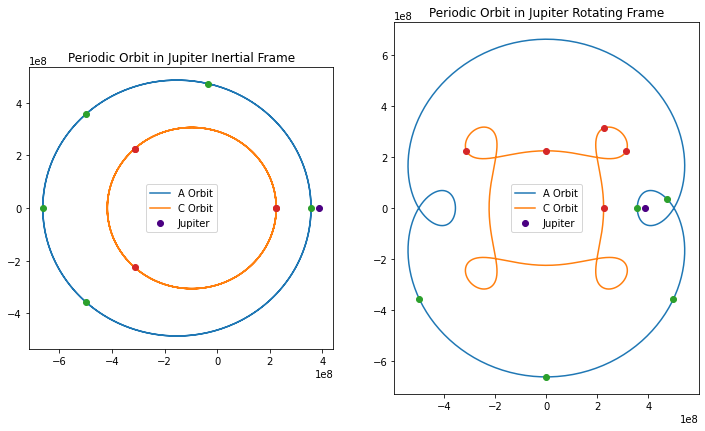

In [37]:
time = np.linspace(0,Per_Jup*3,500)
pos  = np.linspace(0,1,5)*Per_Jup
e = 0.3

thst_Jup = n_Jup*time
thst_Jup_pos = n_Jup*pos

def Jup_frame(time, n, e, a):
    M = time*n
    E = np.array([kp.E_M(m, e) for m in M])
    thst = kp.thst_E_e(E,e)
    r_I = kp.keplar_r(a*(1-e**2),e,thst)*np.vstack((np.cos(thst),np.sin(thst)))
    return r_I

r_I_A = Jup_frame(time, n_A, e, a_A)
r_I_C = Jup_frame(time, n_C, e, a_C)

r_I_A_pos = Jup_frame(pos, n_A, e, a_A)
r_I_C_pos = Jup_frame(pos, n_C, e, a_C)

C_IJ = np.array([[np.cos(thst_Jup), np.sin(thst_Jup)],[-np.sin(thst_Jup), np.cos(thst_Jup)]] )
C_IJ_pos = np.array([[np.cos(thst_Jup_pos), np.sin(thst_Jup_pos)],[-np.sin(thst_Jup_pos), np.cos(thst_Jup_pos)]] )

r_Jup_A = np.zeros(r_I_A.shape)
r_Jup_C = np.zeros(r_I_C.shape)
for i in range(len(thst_Jup)):
    r_Jup_A[:,i] = C_IJ[:,:,i] @ r_I_A[:,i]
    r_Jup_C[:,i] = C_IJ[:,:,i] @ r_I_C[:,i]
    
r_Jup_A_pos = np.zeros(r_I_A_pos.shape)
r_Jup_C_pos = np.zeros(r_I_C_pos.shape)
for i in range(len(thst_Jup_pos)):
    r_Jup_A_pos[:,i] = C_IJ_pos[:,:,i] @ r_I_A_pos[:,i]
    r_Jup_C_pos[:,i] = C_IJ_pos[:,:,i] @ r_I_C_pos[:,i]

# Plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
ax[0].plot(r_I_A[0,:],r_I_A[1,:])
ax[0].plot(r_I_C[0,:],r_I_C[1,:])
ax[0].plot(a_Jup, 0, 'o', color = "indigo")
ax[0].plot(r_I_A_pos[0,:], r_I_A_pos[1,:],'o')
ax[0].plot(r_I_C_pos[0,:], r_I_C_pos[1,:],'o')
ax[0].legend(['A Orbit', 'C Orbit', 'Jupiter'])
ax[0].set_aspect('equal', 'box')
ax[0].set_title('Periodic Orbit in Jupiter Inertial Frame')

ax[1].plot(r_Jup_A[0,:],r_Jup_A[1,:])
ax[1].plot(r_Jup_C[0,:],r_Jup_C[1,:])
ax[1].plot(a_Jup, 0, 'o', color = "indigo")
ax[1].plot(r_Jup_A_pos[0,:], r_Jup_A_pos[1,:],'o')
ax[1].plot(r_Jup_C_pos[0,:], r_Jup_C_pos[1,:],'o')
ax[1].legend(['A Orbit', 'C Orbit', 'Jupiter'])
ax[1].set_aspect('equal', 'box')
ax[1].set_title('Periodic Orbit in Jupiter Rotating Frame')



### e = 0.5

Text(0.5, 1.0, 'Periodic Orbit in Jupiter Rotating Frame')

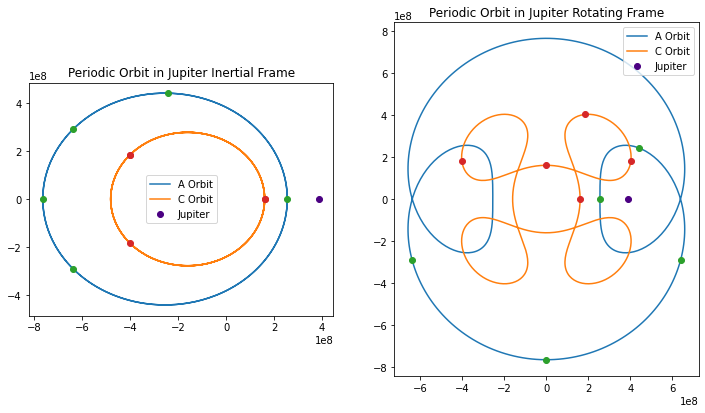

In [38]:
time = np.linspace(0,Per_Jup*3,500)
pos  = np.linspace(0,1,5)*Per_Jup
e = 0.5

thst_Jup = n_Jup*time
thst_Jup_pos = n_Jup*pos

def Jup_frame(time, n, e, a):
    M = time*n
    E = np.array([kp.E_M(m, e) for m in M])
    thst = kp.thst_E_e(E,e)
    r_I = kp.keplar_r(a*(1-e**2),e,thst)*np.vstack((np.cos(thst),np.sin(thst)))
    return r_I

r_I_A = Jup_frame(time, n_A, e, a_A)
r_I_C = Jup_frame(time, n_C, e, a_C)

r_I_A_pos = Jup_frame(pos, n_A, e, a_A)
r_I_C_pos = Jup_frame(pos, n_C, e, a_C)

C_IJ = np.array([[np.cos(thst_Jup), np.sin(thst_Jup)],[-np.sin(thst_Jup), np.cos(thst_Jup)]] )
C_IJ_pos = np.array([[np.cos(thst_Jup_pos), np.sin(thst_Jup_pos)],[-np.sin(thst_Jup_pos), np.cos(thst_Jup_pos)]] )

r_Jup_A = np.zeros(r_I_A.shape)
r_Jup_C = np.zeros(r_I_C.shape)
for i in range(len(thst_Jup)):
    r_Jup_A[:,i] = C_IJ[:,:,i] @ r_I_A[:,i]
    r_Jup_C[:,i] = C_IJ[:,:,i] @ r_I_C[:,i]
    
r_Jup_A_pos = np.zeros(r_I_A_pos.shape)
r_Jup_C_pos = np.zeros(r_I_C_pos.shape)
for i in range(len(thst_Jup_pos)):
    r_Jup_A_pos[:,i] = C_IJ_pos[:,:,i] @ r_I_A_pos[:,i]
    r_Jup_C_pos[:,i] = C_IJ_pos[:,:,i] @ r_I_C_pos[:,i]

#  Plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
ax[0].plot(r_I_A[0,:],r_I_A[1,:])
ax[0].plot(r_I_C[0,:],r_I_C[1,:])
ax[0].plot(a_Jup, 0, 'o', color = "indigo")
ax[0].plot(r_I_A_pos[0,:], r_I_A_pos[1,:],'o')
ax[0].plot(r_I_C_pos[0,:], r_I_C_pos[1,:],'o')
ax[0].legend(['A Orbit', 'C Orbit', 'Jupiter'])
ax[0].set_aspect('equal', 'box')
ax[0].set_title('Periodic Orbit in Jupiter Inertial Frame')

ax[1].plot(r_Jup_A[0,:],r_Jup_A[1,:])
ax[1].plot(r_Jup_C[0,:],r_Jup_C[1,:])
ax[1].plot(a_Jup, 0, 'o', color = "indigo")
ax[1].plot(r_Jup_A_pos[0,:], r_Jup_A_pos[1,:],'o')
ax[1].plot(r_Jup_C_pos[0,:], r_Jup_C_pos[1,:],'o')
ax[1].legend(['A Orbit', 'C Orbit', 'Jupiter'])
ax[1].set_aspect('equal', 'box')
ax[1].set_title('Periodic Orbit in Jupiter Rotating Frame')
